<a href="https://colab.research.google.com/github/Preet1990/Linear-Regression/blob/main/Linear_regr_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1544]:
# importing the libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [1545]:
# read the dataset
data = pd.read_csv('/content/SeoulBikeData.csv')

In [1546]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [1547]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [1548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [1549]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [1550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [1551]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [1552]:
data_corr = data.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [1553]:
#What are the factors that influence the number of bikes rented

In [1554]:
#considering only the features which have absolute correlation value greater tha 0.60

corr = data_corr['Rented Bike Count'][:-1]
corr[abs(corr)>=0.30].sort_values(ascending=False)

Rented Bike Count           1.000000
Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Name: Rented Bike Count, dtype: float64

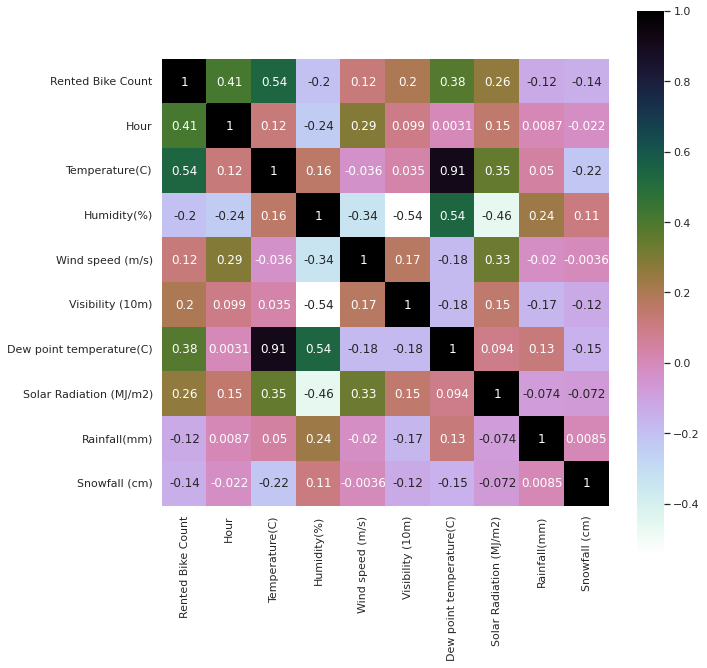

In [1555]:
#Plot the correlation between the variables and state your comments

corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [1556]:
data.drop(['Date'],axis=1 ,inplace = True)

In [1557]:
df = data

In [1558]:
# importing dummies
df = df
for cols in data:
    dummies = pd.get_dummies(data[cols], drop_first=True)
    df = pd.concat([df, dummies], axis="columns")
df


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,5.1,6.0,7.0,7.1,8.8,Spring,Summer,Winter,No Holiday,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


In [1559]:
data.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [1560]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [1561]:
#Explore the data for outliers and missing values.

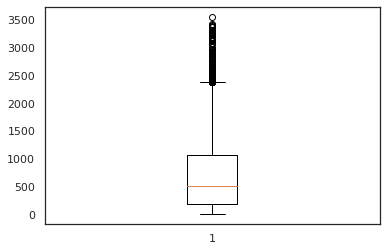

In [1562]:
plt.boxplot(df["Rented Bike Count"])
plt.show()

In [1563]:
Q1 = df["Rented Bike Count"].quantile(0.25)
Q3 = df["Rented Bike Count"].quantile(0.75)
iqr = Q3 - Q1

up_lim = Q3 + 1.5 *iqr
low_lim = Q1 - 1.5*iqr
print(up_lim)
print(low_lim)

2376.625
-1120.375


In [1564]:
df = df[df['Rented Bike Count']< up_lim]
df = df[df['Rented Bike Count']> low_lim]

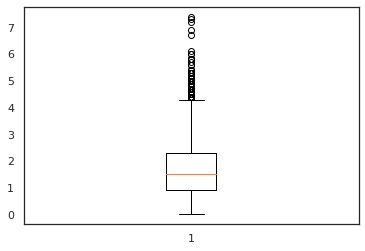

In [1565]:
plt.boxplot(df["Wind speed (m/s)"])
plt.show()

In [1566]:
Q1 = df['Wind speed (m/s)'].quantile(0.25)
Q3 = df['Wind speed (m/s)'].quantile(0.75)
iqr = Q3 - Q1

up_lim = Q3 + 1.5 *iqr
low_lim = Q1 - 1.5*iqr
print(up_lim)
print(low_lim)

4.3999999999999995
-1.1999999999999997


In [1567]:
df = df[df['Wind speed (m/s)']< up_lim]
df = df[df['Wind speed (m/s)']> low_lim]

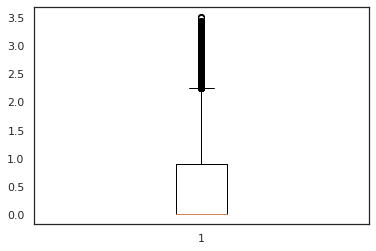

In [1568]:
plt.boxplot(df["Solar Radiation (MJ/m2)"])
plt.show()

In [1569]:
Q1 = df["Solar Radiation (MJ/m2)"].quantile(0.25)
Q3 = df["Solar Radiation (MJ/m2)"].quantile(0.75)
iqr = Q3 - Q1

up_lim = Q3 + 1.5 *iqr
low_lim = Q1 - 1.5*iqr
print(up_lim)
print(low_lim)

2.25
-1.35


In [1570]:
df = df[df["Solar Radiation (MJ/m2)"]< up_lim]
df = df[df["Solar Radiation (MJ/m2)"]> low_lim]

In [1571]:
# selecting the independent variables
X = df.drop(["Rented Bike Count",'Holiday', 'Functioning Day','Seasons'],axis = 1)

In [1572]:
# selecting the dependent variables
y = df["Rented Bike Count"]

In [1573]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.20)

In [1541]:
 #build a linear regression model
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)

LinearRegression()

In [1542]:
# predictions
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

df_pred = ln_reg.predict(X_test)


In [1543]:
#  Model performance by using approapriate diagnostics and measures
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(df_pred, y_test))
# the R2_score is 0.794 so the model performance is good

Mean Absolute Error of linear regression: 64.89851206541637
Mean Square Error of linear regression: 52394.64020733392
R_Squared Score of linear regression: 0.7946439782596822
